In [2]:
from google.colab import drive
drive.mount('/content/drive')

!pip install gradio tensorflow pillow


Mounted at /content/drive


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_dir = "/content/drive/MyDrive/flowers_dataset"

img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = train_gen.num_classes
print("Số lớp hoa:", num_classes, train_gen.class_indices)


Found 342 images belonging to 5 classes.
Found 83 images belonging to 5 classes.
Số lớp hoa: 5 {'daisy': 0, 'orchid': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,417,957 (9.22 MB)

 Trainable params: 2,417,957 (9.22 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen,
    verbose=1
)




Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8126 - loss: 0.6574 - val_accuracy: 0.6988 - val_loss: 0.8199
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7453 - loss: 0.6936 - val_accuracy: 0.7229 - val_loss: 0.7432
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7881 - loss: 0.5599 - val_accuracy: 0.7108 - val_loss: 0.9139
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7667 - loss: 0.5969 - val_accuracy: 0.7711 - val_loss: 0.6917
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7834 - loss: 0.6382 - val_accuracy: 0.6867 - val_loss: 0.8652
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7886 - loss: 0.6888 - val_accuracy: 0.6627 - val_loss: 0.8861
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7739 - loss: 0.6554 - val_accuracy: 0.7590 - val_loss: 0.6735
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7731 - loss: 0.5932 - val_accuracy: 0.7470 - val_loss:

In [15]:
# Lưu model
model.save("/content/drive/MyDrive/model_flowers_cnn.keras")

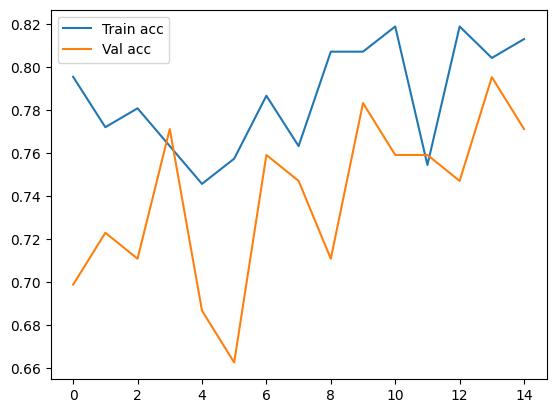

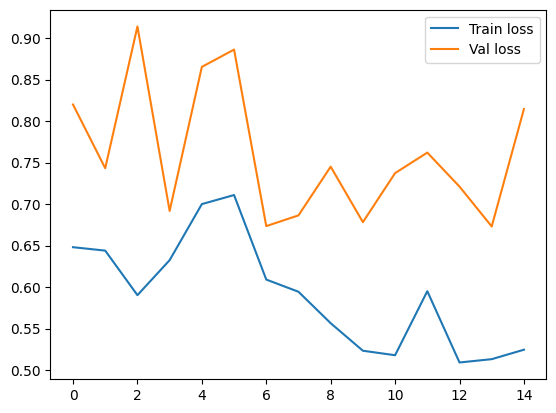

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()


In [17]:
from tensorflow.keras.models import load_model

# Đường dẫn tới file model bạn đã lưu
model = load_model("/content/drive/MyDrive/model_flowers_cnn.keras")

print("✅ Model đã load thành công!")


✅ Model đã load thành công!


In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Map class -> tên tiếng Việt + mô tả
flower_info = {
    "daisy": {
        "name": "Hoa cúc",
        "desc": "Hoa cúc tượng trưng cho sự thuần khiết và ngây thơ, thường có cánh trắng và nhụy vàng. Ở Việt Nam, hoa cúc còn được coi là biểu tượng của sự trường thọ và hiếu thảo."
    },
        "orchid": {
        "name": "Lan",
        "desc": "Lan mỏng manh, hạt hoa bay theo gió mang theo ước mơ và hy vọng. Biểu tượng của tự do, tuổi trẻ và khát vọng."
    },
    "rose": {
        "name": "Hoa hồng",
        "desc": "Hoa hồng – nữ hoàng của các loài hoa. Nó tượng trưng cho tình yêu, niềm đam mê và cái đẹp. Mỗi màu sắc hoa hồng lại mang một ý nghĩa riêng: đỏ (tình yêu mãnh liệt), trắng (tinh khôi), vàng (tình bạn)."
    },
    "sunflower": {
        "name": "Hoa hướng dương",
        "desc": "Hoa hướng dương luôn hướng về phía mặt trời, tượng trưng cho sự trung thành và lạc quan. Ở Việt Nam, nó thường được tặng để chúc may mắn và thành công."
    },
        "tulip": {
        "name": "Hoa tulip",
        "desc": "Tulip có nguồn gốc từ Hà Lan, mang vẻ thanh tao và sang trọng. Với nhiều màu sắc rực rỡ, hoa tulip tượng trưng cho sự thịnh vượng và tình yêu lãng mạn."
    },
}

class_names = list(flower_info.keys())

def predict_flower(img):
    img = img.resize((64,64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0

    preds = model.predict(x)
    pred_class = class_names[np.argmax(preds)]
    prob = float(np.max(preds) * 100)

    result = f"🌸 {flower_info[pred_class]['name']} ({prob:.2f}%)\n\n{flower_info[pred_class]['desc']}"
    return result


In [22]:
import gradio as gr

def predict_flower_ui(img):
    # Dự đoán
    result = predict_flower(img)

    # Lấy tên + mô tả
    lines = result.split("\n\n")
    title = lines[0]
    desc = lines[1] if len(lines) > 1 else ""

    # Format HTML cho đẹp
    html_result = f"""
    <div style="font-size:22px; font-weight:bold; color:#2c3e50; margin-bottom:15px;">
        {title}
    </div>
    <div style="font-size:18px; line-height:1.6; text-align:justify; color:#34495e;">
        {desc}
    </div>
    """
    return img, html_result

# Tạo UI gồm 2 phần: ảnh + thông tin
demo = gr.Interface(
    fn=predict_flower_ui,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Image(label="Ảnh bạn đã upload", type="pil"),
        gr.HTML(label="Kết quả nhận diện")
    ],
    title="🌸 Nhận diện loài hoa",
    description="Upload ảnh hoa để hệ thống nhận diện và hiển thị thông tin chi tiết bằng tiếng Việt (hiển thị to rõ, dễ nhìn)."
)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bade278f08d08c1175.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
